## Example

In this simple example, we load an image, pre-process it, and classify it with a pretrained EfficientNet.

In [1]:
import json
from PIL import Image

import torch
from torchvision import transforms

from efficientnet_pytorch import EfficientNet

In [2]:
model_name = 'efficientnet-b0'
image_size = 128  # EfficientNet.get_image_size(model_name) # 224

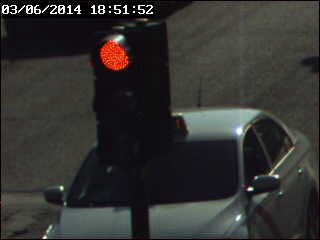

In [22]:
# Open image
img = Image.open('rojo.jpg')
img

In [23]:
# Preprocess image
tfms = transforms.Compose([transforms.Resize(image_size), transforms.CenterCrop(image_size),
                           transforms.ToTensor(),
                           transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),])
img = tfms(img).unsqueeze(0)

In [5]:
# Load class names
labels_map = json.load(open('labels_map.txt'))
labels_map = [labels_map[str(i)] for i in range(len(labels_map))]

In [6]:
num_classes = 2
weights_path="C:/git/EfficientNet-PyTorch/results/model_Best.pth.tar"

state_dict = torch.load(weights_path)
fc_weight = state_dict['state_dict']['_fc.weight']
print("Number of output classes of the weights loaded:", fc_weight.shape[0])


Number of output classes of the weights loaded: 2


In [14]:
override_params = {"image_size":128}
model = EfficientNet.from_pretrained(model_name, num_classes=2, **override_params)

ret = model.load_state_dict(state_dict['state_dict'], strict=False)
print(f"ret.missing_keys: {ret.missing_keys}")

Num of classes redefined: 1000->2
Loaded pretrained weights for efficientnet-b0
Num of classes redefined: 1000->2
ret.missing_keys: []


In [24]:
# Classify with EfficientNet
model.eval()
with torch.no_grad():
    logits = model(img)
preds = torch.topk(logits, k=1).indices.squeeze(0).tolist()

print('-----')
for idx in preds:
    label = labels_map[idx]
    prob = torch.softmax(logits, dim=1)[0, idx].item()
    print('{:<75} ({:.2f}%)'.format(label, prob*100))

-----
rojo                                                                        (98.56%)
